# Sentimental Analysis : MINOR PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
pip install opendatasets

# Loading Data

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/marrrcin.csv",encoding='latin-1')
df2 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/Joseph-Ndungi.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/utquarsh027/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/d1.csv",encoding='latin-1')
df4 = pd.read_csv("https://raw.githubusercontent.com/utquarsh027/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/prateekjoshi565.csv")
# !pip install opendatasets
import opendatasets as od
dataset_url ='https://www.kaggle.com/datasets/kazanova/sentiment140'
od.download(dataset_url)
od.download("https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt") # word embadding
import os
data_dir='./sentiment140'

os.listdir(data_dir)
train_csv=data_dir + '/training.1600000.processed.noemoticon.csv'
df8=pd.read_csv(train_csv,encoding='ISO-8859-1')


# "username":"vanshsamaiya","key":"9d383525d36fef472cc6cfd8047b3ed0"

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vanshsamaiya
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:01<00:00, 52.2MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vanshsamaiya
Your Kaggle Key: ··········


100%|██████████| 131M/131M [00:00<00:00, 158MB/s]


In [ ]:

glove_ = '/content/glove6b100dtxt/glove.6B.100d.txt'
glove_files = pd.read_csv(glove_,delimiter = '\t', error_bad_lines=False,encoding='utf8',engine = 'python')

<ipython-input-4-091642c305d1>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  glove_files = pd.read_csv(glove_,delimiter = '\t', error_bad_lines=False,encoding='utf8',engine = 'python')
Skipping line 9: field larger than field limit (131072)


In [ ]:
glove_files.shape

(399845, 1)

In [ ]:
df_list=[df1,df2,df3,df4,df8]
df1=df1[['Category']]
df1.dropna(inplace=True)
df1_a=df1[df1['Category']!='Not Available']
df1_a.rename(columns={'Category':'tweets'},inplace=True)
#df2
df2_a=df2[['text']]
df2_a.rename(columns={'text':'tweets'},inplace=True)
#df3
df3.rename(columns={'message to examine':'tweets'},inplace=True)
df3_a=df3[['tweets']]
df3_a.dropna(inplace=True)
#df4
df4_a=df4[['tweet']]
df4_a.rename(columns={'tweet':'tweets'},inplace=True)
#df8
df8.columns=['1','2','3','4','5','6']
df8_a=df8[['6']]
df8_a.rename(columns={'6':'tweets'},inplace=True)


df_list = [df1_a,df2_a,df3_a,df4_a, df8_a]

<ipython-input-6-52cf7ae534c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
<ipython-input-6-52cf7ae534c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_a.rename(columns={'Category':'tweets'},inplace=True)
<ipython-input-6-52cf7ae534c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_a.rename(columns={'text':'tweets'},inplace=True)
<ipython-input-6-52cf7ae534c6>:12: SettingWithCopyWarning: 
A va

# Preprocessing



> In the following peice of code, extraction of english words is carried out:
* As this project mainly focuses on english language tweet thus extracting only english words and getting rid of unnecessary characters.



In [ ]:
s =['Do you like my pokemon?     ','  dvf  ']
ss =[]
for i in s:
    # i.strip()
    ss.append(i.strip())
print(ss)

['Do you like my pokemon?', 'dvf']


In [ ]:
df2_a.head()

,tweets
0,@CBCNews Stupid Canadians jumping up to defend...
1,The misty rain on the painted bridge \n#南京spa ...
2,To love beauty is to see light. https://t.co/c...
3,“how are you?!”\nme: https://t.co/33r0ouu59L
4,Do you like my pokemon? 🥺💕 \n#成都同城 #成都资源 #成都 h...


In [ ]:
def english_only(tweets):

  alpha = (list(string.ascii_letters))
  valid = []
  final = []
  for i in alpha :
    valid.append(i)
  for i in range(0,10):
    valid.append(str(i))
  symbols = ['!','?','.','@','#','"',',',"'",'/',':','(',')']
  for i in symbols:
    valid.append(i)

  def replace(l,v):
    m =[]

    for i in l:
      for j in i:
        if j not in valid:
          i = i.replace(j," ")

      m.append(i)
    return m

  final = replace(tweets,valid)


  def spaceremoval(tweets):
    new_lst = []
    pattern=re.compile(r'# +')
    p2 = re.compile(r'\bhttps:\/\/\S+')
    for i in tweets:
        i=re.sub(pattern,"",i)
        i=re.sub(p2,"",i)                   # change made 1 https links removed
        new_lst.append(i.strip())           # change made 2 any leading (spaces at the beginning) and trailing (spaces at the end) removed
    return new_lst
  final_1 = spaceremoval(final)
  return final_1


mylist =["Do you like my pokemon? 🥺💕 \n#成都同城 #成都资源 #成都 ","@jk cdbsa jf #  # https://t.co/aAygEyHKTK"]
try1 = english_only(mylist)
print(try1)
# try2 = spaceremoval(try1)
# print(try2)

['Do you like my pokemon?', '@jk cdbsa jf']


In [ ]:
for d in df_list:
  d["tweets"] = english_only(d["tweets"])

<ipython-input-10-97378c487af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["tweets"] = english_only(d["tweets"])


In [ ]:
df2_a.head()

,tweets
0,@CBCNews Stupid Canadians jumping up to defend...
1,The misty rain on the painted bridge spa spa spa
2,To love beauty is to see light.
3,how are you?! me:
4,Do you like my pokemon?




> In the following piece  of code all the hashtags and mentions are extracted and fed in to a new column.



In [ ]:
def find_hashtags(tweet):
    #This function extracts hashtags from the tweets.
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentions(tweet):
    #This function extracts hashtags from the tweets.
    return  re.findall('(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

for i in df_list :
  i['hashtags']  = i.tweets.apply(find_hashtags)
  i['mentions']  = i.tweets.apply(find_mentions)

df1_a.head()

<ipython-input-12-a795e1d08034>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['hashtags']  = i.tweets.apply(find_hashtags)
<ipython-input-12-a795e1d08034>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['mentions']  = i.tweets.apply(find_mentions)
<ipython-input-12-a795e1d08034>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,tweets,hashtags,mentions
0,dear @Microsoft the newOoffice for Mac is grea...,[],[@Microsoft]
1,@Microsoft how about you make a system that do...,[],[@Microsoft]
4,If I make a game as a #windows10 Universal App...,"[#windows10, #xboxone]","[@majornelson, @Microsoft]"
5,"Microsoft, I may not prefer your gaming branch...",[#Windows10],[@Microsoft]
6,@MikeWolf1980 @Microsoft I will be downgrading...,"[#Windows10, #Windows10fail]","[@MikeWolf1980, @Microsoft]"


In [ ]:
df_list = [df1_a,df2_a,df3_a,df4_a, df8_a]

df_combined = pd.concat(df_list)
print(df_combined.shape)
df_combined.head()

(1632150, 3)


,tweets,hashtags,mentions
0,dear @Microsoft the newOoffice for Mac is grea...,[],[@Microsoft]
1,@Microsoft how about you make a system that do...,[],[@Microsoft]
4,If I make a game as a #windows10 Universal App...,"[#windows10, #xboxone]","[@majornelson, @Microsoft]"
5,"Microsoft, I may not prefer your gaming branch...",[#Windows10],[@Microsoft]
6,@MikeWolf1980 @Microsoft I will be downgrading...,"[#Windows10, #Windows10fail]","[@MikeWolf1980, @Microsoft]"


In [ ]:
sf1 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/Emotion_final.csv",sep=',')
sf2 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/emotion-dataset.csv",sep=',')

sf6 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/tweet_emotions.csv",sep=',')
sf7 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/train.txt",sep=';' ,names=["Text", "Emotion"])
sf8 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/test.txt",sep=';' ,names=["Text", "Emotion"])
sf9 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/val.txt",sep=';' ,names=["Text", "Emotion"])

sf10 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/hate%20dataset.csv",sep =',',encoding='latin-1')

sf_3 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_1.csv",sep=',')
sf_4 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_2.csv",sep=',')
sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')


<ipython-input-14-f7dbf5895dc1>:13: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')


In [ ]:
sf6.rename(columns ={'sentiment':'Emotion','content':'Text'},inplace = True)
sf10.rename(columns ={'label':'Emotion','text':'Text'},inplace = True)

we have -
'sadness' 'anger' 'love' 'surprise' 'fear' 'happy' 'neutral' 'joy' 'shame' 'disgust' 'empty' 'enthusiasm' 'worry' 'fun' 'hate' 'happiness'

In [ ]:
print(' shape of sf1  -> ',sf1.shape,'\n shape of sf_2 -> ', sf2.shape,'\n shape of sf_3 -> ', sf_3.shape,'\n shape of sf_4 -> ', sf_4.shape,'\n shape of sf5  -> ', sf_5.shape ,'\n shape of sf6  -> ', sf6.shape,'\n shape of sf7  -> ', sf7.shape,'\n shape of sf8  -> ', sf8.shape ,'\n shape of sf9  -> ', sf9.shape,'\n shape of sf10  -> ', sf10.shape)

 shape of sf1  ->  (21459, 2) 
 shape of sf_2 ->  (34792, 2) 
 shape of sf_3 ->  (70000, 37) 
 shape of sf_4 ->  (70000, 37) 
 shape of sf5  ->  (70822, 37) 
 shape of sf6  ->  (40000, 3) 
 shape of sf7  ->  (16000, 2) 
 shape of sf8  ->  (2000, 2) 
 shape of sf9  ->  (2000, 2) 
 shape of sf10  ->  (11970, 2)


---------------------- add karna hai df 10 hate badane ke liye --------------------

In [ ]:
sf6.drop(['tweet_id'],axis =1, inplace = True)
sf6 = sf6.loc[:,['Text','Emotion']]
sf2 = sf2.loc[:,['Text','Emotion']]
sf10 = sf10[sf10['Emotion'] == 1]

In [ ]:
sf10['Emotion'] = sf10['Emotion'].replace(1,'hate')

<ipython-input-18-8ad1c4d804ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf10['Emotion'] = sf10['Emotion'].replace(1,'hate')


In [ ]:
sf_345 = [sf_3,sf_4,sf_5]

In [ ]:
for i in sf_345:
  i.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id'],axis = 1,inplace = True)



In [ ]:
sf3 = sf_3[sf_3['example_very_unclear']== False]
sf4 = sf_4[sf_4['example_very_unclear']== False]
sf5 = sf_5[sf_5['example_very_unclear']== False]

In [ ]:
sf345 =[sf3,sf4,sf5]

In [ ]:
for i in sf345:
  i.drop(['example_very_unclear'],inplace = True,axis =1)

<ipython-input-23-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
<ipython-input-23-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
<ipython-input-23-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)


In [ ]:
a_3 = np.array(sf3.drop(['text'],axis =1))
a_4 = np.array(sf4.drop(['text'],axis =1))
a_5 = np.array(sf5.drop(['text'],axis =1))

In [ ]:
a3 = np.argmax(a_3, axis=1)
a4 = np.argmax(a_4, axis=1)
a5 = np.argmax(a_5, axis=1)

a5

array([ 9, 13,  6, ...,  5,  0,  2])

In [ ]:
sf3['Emotion'] = a3
sf4['Emotion'] = a4
sf5['Emotion'] = a5

for i in sf345:
  i.rename(columns = {'text':'Text'},inplace = True)
sf4.head()

<ipython-input-26-f77990883cbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf3['Emotion'] = a3
<ipython-input-26-f77990883cbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf4['Emotion'] = a4
<ipython-input-26-f77990883cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Emotion
0,We can hope,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,20
1,Shhh don't give them the idea!,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,"Thank you so much, kind stranger. I really nee...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,Ion know but it would be better for you to jus...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,27
4,I'm honestly surprised. We should have fallen ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [ ]:
sf3 = sf3[['Text', 'Emotion']]
sf4 = sf4[['Text', 'Emotion']]
sf5 = sf5[['Text', 'Emotion']]
sf4.head()

,Text,Emotion
0,We can hope,20
1,Shhh don't give them the idea!,2
2,"Thank you so much, kind stranger. I really nee...",15
3,Ion know but it would be better for you to jus...,27
4,I'm honestly surprised. We should have fallen ...,13


In [ ]:
emotions = {0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

In [ ]:

sf3 = sf3.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf4 = sf4.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf5 = sf5.applymap(lambda s: emotions.get(s) if s in emotions else s)


In [ ]:
sf5.head()

,Text,Emotion
0,Worst ending ever! I won't spoil it but this o...,disappointment
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
3,"thanks, I agree",approval
4,Why would you doubt it dumbass?,anger


In [ ]:
# list1 =['joy','amusement','approval','sadness','disappointment','remorse','grief','disapproval','neutral','admiration','gratitude']
# list2 =['neutral']
# sf5 = sf5[sf5.Emotion.isin(list1)== False]
# sf4 = sf4[sf4.Emotion.isin(list1)== False]

In [ ]:
sfs = [sf1,sf2,sf3,sf4,sf5,sf6,sf7,sf8,sf9,sf10]

In [ ]:
for i in sfs :
    print(i['Emotion'].unique())


['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']
['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']
['sadness' 'neutral' 'love' 'gratitude' 'disapproval' 'amusement'
 'disappointment' 'admiration' 'realization' 'annoyance' 'confusion'
 'optimism' 'curiosity' 'excitement' 'caring' 'disgust' 'remorse' 'joy'
 'approval' 'embarrassment' 'surprise' 'anger' 'grief' 'pride' 'desire'
 'relief' 'fear' 'nervousness']
['optimism' 'anger' 'gratitude' 'neutral' 'excitement' 'fear' 'curiosity'
 'caring' 'disappointment' 'admiration' 'desire' 'disgust' 'confusion'
 'amusement' 'annoyance' 'surprise' 'disapproval' 'sadness' 'relief'
 'realization' 'approval' 'nervousness' 'joy' 'embarrassment' 'love'
 'grief' 'pride' 'remorse']
['disappointment' 'excitement' 'confusion' 'approval' 'anger' 'neutral'
 'amusement' 'sadness' 'curiosity' 'annoyance' 'disapproval' 'admiration'
 'desire' 'surprise' 'realization' 'love' 'caring' 'optimism' 'gratitude'
 'embarrassment' 'joy' 'relief' '

In [ ]:
emotion_list = []

for i in sfs:
  for j in i['Emotion'].unique():
      emotion_list.append(j)
emotion_list

['sadness',
 'anger',
 'love',
 'surprise',
 'fear',
 'happy',
 'neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'sadness',
 'neutral',
 'love',
 'gratitude',
 'disapproval',
 'amusement',
 'disappointment',
 'admiration',
 'realization',
 'annoyance',
 'confusion',
 'optimism',
 'curiosity',
 'excitement',
 'caring',
 'disgust',
 'remorse',
 'joy',
 'approval',
 'embarrassment',
 'surprise',
 'anger',
 'grief',
 'pride',
 'desire',
 'relief',
 'fear',
 'nervousness',
 'optimism',
 'anger',
 'gratitude',
 'neutral',
 'excitement',
 'fear',
 'curiosity',
 'caring',
 'disappointment',
 'admiration',
 'desire',
 'disgust',
 'confusion',
 'amusement',
 'annoyance',
 'surprise',
 'disapproval',
 'sadness',
 'relief',
 'realization',
 'approval',
 'nervousness',
 'joy',
 'embarrassment',
 'love',
 'grief',
 'pride',
 'remorse',
 'disappointment',
 'excitement',
 'confusion',
 'approval',
 'anger',
 'neutral',
 'amusement',
 'sadness',
 'curiosity',
 'anno

In [ ]:
emotion_set = set(emotion_list)
print(len(emotion_set))
print(emotion_set)


37
{'admiration', 'relief', 'fun', 'shame', 'embarrassment', 'joy', 'surprise', 'amusement', 'pride', 'optimism', 'happiness', 'fear', 'disgust', 'approval', 'disappointment', 'worry', 'disapproval', 'nervousness', 'excitement', 'annoyance', 'boredom', 'confusion', 'neutral', 'enthusiasm', 'sadness', 'gratitude', 'anger', 'grief', 'desire', 'empty', 'curiosity', 'realization', 'caring', 'remorse', 'hate', 'love', 'happy'}


In [ ]:
sf1.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
sf2.head()

,Text,Emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy


In [ ]:
sf3.head()


,Text,Emotion
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude


In [ ]:
sf4.head()

,Text,Emotion
0,We can hope,optimism
1,Shhh don't give them the idea!,anger
2,"Thank you so much, kind stranger. I really nee...",gratitude
3,Ion know but it would be better for you to jus...,neutral
4,I'm honestly surprised. We should have fallen ...,excitement


In [ ]:
sf5.head()

,Text,Emotion
0,Worst ending ever! I won't spoil it but this o...,disappointment
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
3,"thanks, I agree",approval
4,Why would you doubt it dumbass?,anger


In [ ]:
sf6.head()

,Text,Emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [ ]:
sf7.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
sf8.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
sf9.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
sf10.shape

(5035, 2)

In [ ]:
sf_combined = pd.concat(sfs)

In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
admiration,17135
amusement,8866
anger,18070
annoyance,11928
approval,15529
boredom,179
caring,5150
confusion,6601
curiosity,7708


In [ ]:
sf_combined.loc[(sf_combined.Emotion == 'empty')].tail(10)

,Text,Emotion
39492,@niariley follow me too,empty
39521,@Catwoman123 Something like that,empty
39543,http://twitpic.com/4wuaq - another prof pic.,empty
39549,@NukeSpoon precisely. The more followers you ...,empty
39689,"right im off for a shower my little treasures,...",empty
39702,"Here we go again, back to work. Happy Mothers ...",empty
39742,@PhilippaJane the &quot;no pants&quot; idea co...,empty
39749,@sloanyxxx Thanks,empty
39845,@xxxRobyn Yeah *fingers crossed*,empty
39975,@lexia Or even listen to Susan's green policies,empty


In [ ]:
sf_combined.loc[(sf_combined.Emotion == 'disapproval')].head(10)

,Text,Emotion
6,"He isn't as big, but he's still quite popular....",disapproval
36,"I can't stand [NAME]. Especially since her ""ta...",disapproval
55,There has to be some repercussions for this ju...,disapproval
77,>Did you just call me a liar? Sick reference.,disapproval
79,It doesn't matter. You can pick someone with t...,disapproval
88,"You're both wrong NBA is an initialism, can't ...",disapproval
96,"That's professor [NAME] to you, savage!",disapproval
119,It’s the format. It’s like one of those bad [N...,disapproval
154,"Ones with close ties to SA, anyway. An escaped...",disapproval
207,Hmmm I dont think I listen to only [NAME] if I...,disapproval


In [ ]:
#70715	She just likes to fight, donï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t worr - approval

In [ ]:
print(len(emotion_set),emotion_set)

37 {'admiration', 'relief', 'fun', 'shame', 'embarrassment', 'joy', 'surprise', 'amusement', 'pride', 'optimism', 'happiness', 'fear', 'disgust', 'approval', 'disappointment', 'worry', 'disapproval', 'nervousness', 'excitement', 'annoyance', 'boredom', 'confusion', 'neutral', 'enthusiasm', 'sadness', 'gratitude', 'anger', 'grief', 'desire', 'empty', 'curiosity', 'realization', 'caring', 'remorse', 'hate', 'love', 'happy'}


<Axes: >

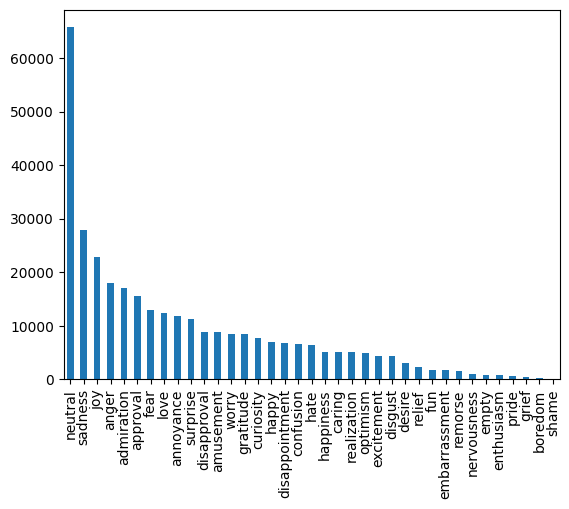

In [ ]:
sf_combined['Emotion'].value_counts().plot(kind = 'bar')

Dropping data having ***approval*** and ***disapproval*** because these emotions occupy a greater extent of other emotions and also are biased somehow to neutral

Data for ***shame***, ***empty*** is insignificant and it cannot be generalised to the narrowed class emotions affectively

Data for relization is significant but it cannot be generalised to the narrowed class emotions affectively

In [ ]:
sf_combined = sf_combined[sf_combined['Emotion'] != 'realization' ]
sf_combined = sf_combined[ sf_combined['Emotion'] != 'shame']
sf_combined = sf_combined[ sf_combined['Emotion'] != 'approval']
sf_combined = sf_combined[ sf_combined['Emotion'] != 'disapproval']
sf_combined = sf_combined[ sf_combined['Emotion'] != 'empty']

<font color='navy'>There are total of 37 emotions in these datasets as follows:  </font>


{'optimism', 'happiness', 'empty', 'nervousness', 'disapproval', 'worry', 'gratitude', 'sadness', 'curiosity', 'surprise', 'fear', 'anger', 'embarrassment', 'relief', 'enthusiasm', 'realization', 'approval', 'desire', 'happy', 'confusion', 'disappointment', 'caring', 'remorse', 'admiration',
'grief', 'amusement', 'hate', 'neutral', 'love', 'pride', 'joy', 'shame', 'disgust', 'excitement', 'boredom', 'fun', 'annoyance'}

<font color='navy'>
These 37 emotions are narrowed down to 9 emotions in order to get more accurate results.
</font>

In [ ]:
emotion_dict = {
 'happy':               ['happiness','joy','fun','happy'],
 'sadness':             ['sadness','disappointment','remorse','grief','boredom','embarrassment'], #shame
 'love':                ['love','caring'],
 'anger':               ['anger','annoyance'],
 'fear':                ['fear','worry','nervousness'],
 'excitement':          ['excitement','enthusiasm','desire','amusement'],
 'surprise-curiosity':  ['curiosity','confusion','surprise'],
 'neutral':             ['neutral'], #realization, empty
 'hate':                ['hate','disgust'],
 'gratitude':           ['gratitude','admiration','pride','optimism','relief'],
 # 'evaluative':          ['approval','disapproval']
 }

In [ ]:
#sf_combined = sf_combined.applymap(lambda s: emotions_dict.get(s) if s in emotions else s)
for k,v in emotion_dict.items():

        sf_combined.replace(v,k,inplace = True)


In [ ]:
sf_combined.sample(10)

,Text,Emotion
192,i feel better without it,happy
5816,"The one night I don't wanna sleep early, is th...",happy
7358,This poor butterfly was dead http://twitpic.c...,fear
66467,Definitely very messy. Thank you so much for y...,gratitude
30740,Please post any news you may find about her fa...,sadness
38358,With just coffee and nothing fancy I did love ...,love
55323,I'm a male and I have trouble understanding th...,neutral
15825,is such a weak emotion that's why I despise it.,fear
10931,i am so happy but yet i feel enraged,anger
19334,winning a rowing race at a karapiro regatta wi...,happy


In [ ]:
sf_combined.shape

(298151, 2)

In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,29998
excitement,17002
fear,22357
gratitude,33619
happy,36943
hate,10640
love,17604
neutral,65731
sadness,38623


In [ ]:
sf_combined["Text"] = english_only(sf_combined["Text"])

<Axes: >

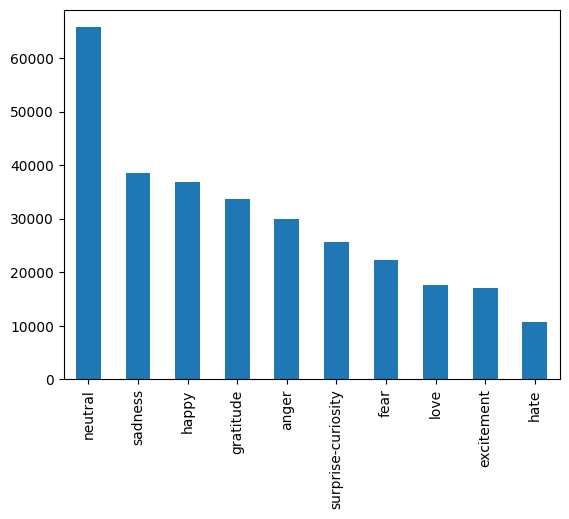

In [ ]:
sf_combined['Emotion'].value_counts().plot(kind = 'bar')

### mitigating the skewedness of data

In [ ]:
neutral = sf_combined[sf_combined['Emotion']=='neutral']
happy = sf_combined[sf_combined['Emotion']=='happy']
sad = sf_combined[sf_combined['Emotion']=='sadness']
gratitude = sf_combined[sf_combined['Emotion']=='gratitude']
anger = sf_combined[sf_combined['Emotion']=='anger']
fear = sf_combined[sf_combined['Emotion']=='fear']
love = sf_combined[sf_combined['Emotion']=='love']
excitement = sf_combined[sf_combined['Emotion']=='excitement']
hate = sf_combined[sf_combined['Emotion']=='hate']
surprise = sf_combined[sf_combined['Emotion']=='surprise-curiosity']


In [ ]:
neutral_under     = neutral.sample(25000)
happy_under       = happy.sample(25000)
sad_under         = sad.sample(25000)
gratitude_under   = gratitude.sample(25000)
fear_under        = fear.sample(25000, replace = True)
love_over         = love.sample(25000, replace = True)
excitement_over   = excitement.sample(25000, replace = True)
hate_over         = hate.sample(25000, replace = True)
anger_roundoff    = anger.sample(25000,replace = True)
surprise_roundoff = surprise.sample(25000)

In [ ]:
sf_new = pd.concat([neutral_under,happy_under,sad_under,gratitude_under, fear_under,love_over,excitement_over,hate_over,anger_roundoff,surprise_roundoff],axis =0)
print(sf_new.Emotion.value_counts())

neutral               25000
happy                 25000
sadness               25000
gratitude             25000
fear                  25000
love                  25000
excitement            25000
hate                  25000
anger                 25000
surprise-curiosity    25000
Name: Emotion, dtype: int64


<Axes: xlabel='Emotion', ylabel='count'>

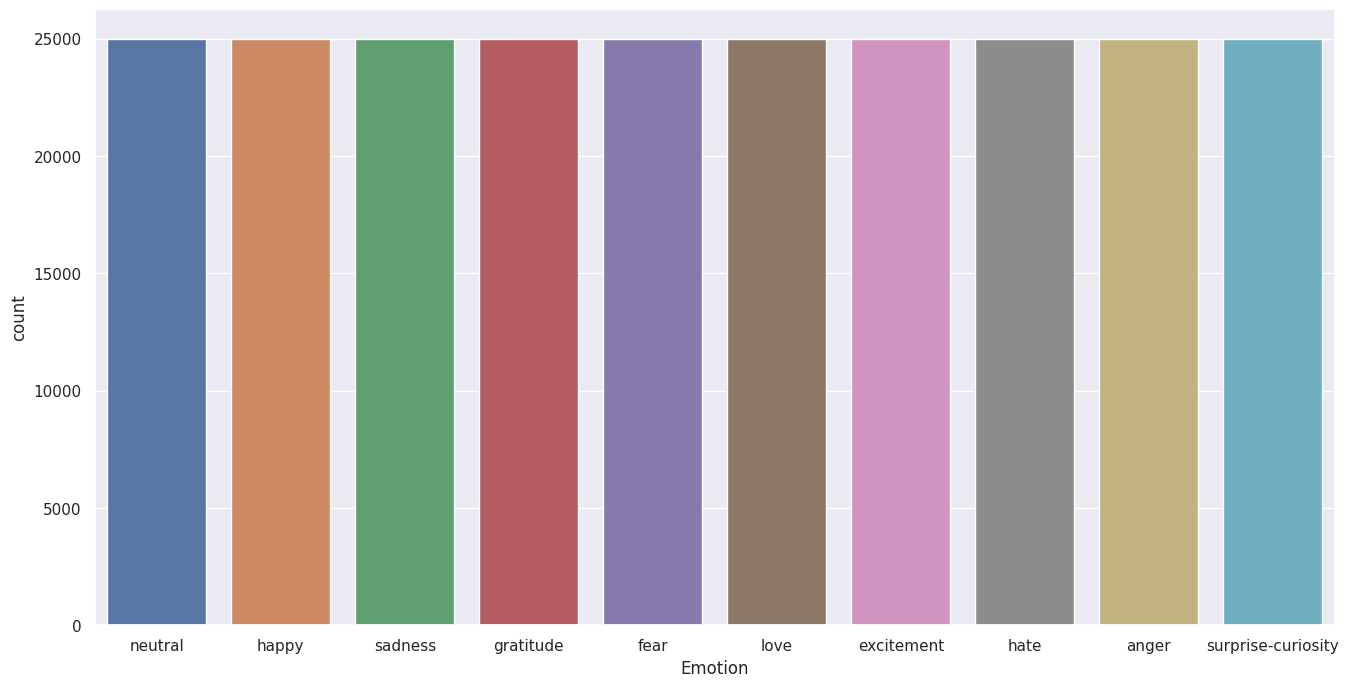

In [ ]:

sns.set(rc={'figure.figsize':(16,8)})

sns.countplot(x = 'Emotion' , data = sf_new)


In [ ]:
sf_combined = sf_new

In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,25000
excitement,25000
fear,25000
gratitude,25000
happy,25000
hate,25000
love,25000
neutral,25000
sadness,25000


In [ ]:
sf_combined.shape

(250000, 2)

In [ ]:
sf_combined.loc[(sf_combined.Emotion == 'happy')].head(10)

,Text,Emotion
31495,Peace to you both.,happy
49838,"I enjoyed it somewhat, but haven't felt like r...",happy
32462,Thank u to all the amazing people who r follow...,happy
20138,Salesmen were still tramping the aisles of the...,happy
13914,i spent a few hours listening to the thundersh...,happy
3826,i feel like im actually doing somewhat well wi...,happy
947,i feel highs so ecstatic that just being norma...,happy
12324,i feel that someone is trying to pry out of my...,happy
7841,i feel a bit optimistic some days,happy
28945,staying up alllnight doing a damn art project ...,happy


***END OF PREPROCESSING***

##**Model Training:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Transformers
from sklearn. feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# cols_to_scale = ['Emotion']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sf3['Emotion'] = le.fit_transform(sf3['Emotion'])
# sf3

In [ ]:
X=sf_combined['Text']
y=sf_combined['Emotion']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
print("Logistic Regression -")
print(f"Test score : {pipe_lr.score(x_test,y_test)}\nTrain score : {pipe_lr.score(x_train,y_train)}")

Logistic Regression -
Test score : 0.55124
Train score : 0.65336


In [ ]:
y_pred = pipe_lr.predict(x_test)
y_pred

array(['happy', 'hate', 'excitement', ..., 'surprise-curiosity',
       'gratitude', 'gratitude'], dtype=object)

In [ ]:
from sklearn.metrics import recall_score
print('recall score = ',recall_score(y_test,y_pred,average='macro'))

recall score =  0.5512700386323467


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test,y_pred))

accuracy =  0.55124


In [ ]:
from sklearn.metrics import precision_score
print('precission = ',precision_score(y_test,y_pred,average = 'macro'))

from sklearn.metrics import f1_score
print('F1 Score = ',f1_score(y_test, y_pred, average='macro'))

ValueError: ignored

 **Naive Bayes Algorithm:**



In [ ]:
pipe_nb = Pipeline(steps = [('cv',CountVectorizer()),('nb',MultinomialNB() )])

In [ ]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
print("Multinomial Naive Bayes -")
print(f"Test score : {pipe_nb.score(x_test,y_test)}\nTrain score : {pipe_nb.score(x_train,y_train)}")

Multinomial Naive Bayes -
Test score : 0.5226533333333333
Train score : 0.6231371428571428


In [ ]:
y_pred = pipe_nb.predict(x_test)


In [ ]:
print('recall score = ',recall_score(y_test,y_pred,average='macro'))

recall score =  0.5227499731749935


In [ ]:
print('accuracy = ',accuracy_score(y_test,y_pred))
print('precission = ',precision_score(y_test,y_pred,average = 'macro'))

accuracy =  0.5226533333333333
precission =  0.519111184784757


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# pipe_tree = Pipeline(steps=[('cv',CountVectorizer()),('dtree',DecisionTreeClassifier())])

In [ ]:
#pipe_tree.fit(x_train,y_train)

In [ ]:
# print("Decision Tree -")
# print(f"Test score : {pipe_tree.score(x_test,y_test)}\nTrain score : {pipe_tree.score(x_train,y_train)}")

In [ ]:
# cols_to_scale = ['Emotion']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sf_combined['Emotion'] = le.fit_transform(sf_combined['Emotion'])
# sf_combined

In [ ]:
# X=sf_combined['Text']
# y=sf_combined['Emotion']

# x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [ ]:
# from sklearn.feature_extraction import DictVectorizer
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(x_train)
# X_test = vectorizer.transform(x_test)

In [ ]:
# def train_test(clf, X_train, X_test, y_train, y_test):
#     clf.fit(X_train, y_train)
#     train_acc = accuracy_score(y_train, clf.predict(X_train))
#     test_acc = accuracy_score(y_test, clf.predict(X_test))
#     return train_acc, test_acc

In [ ]:
# lr = LogisticRegression()
# mnb = MultinomialNB()
# #knn =KNeighborsClassifier()
# # svc = SVC()
# # lsvc = LinearSVC(random_state=123)
# dtree = DecisionTreeClassifier()

# clifs = [lr, mnb, dtree]

# # train and test them
# print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
# print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
# for clf in clifs:
#     clf_name = clf.__class__.__name__
#     train_acc, test_acc = train_test(clf, x_train, x_test, y_train, y_test)
#     print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

## Using Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Activation, Flatten

In [ ]:
le = LabelEncoder()
sf_combined['Emotion'] = le.fit_transform(sf_combined['Emotion'])

In [ ]:
sf_combined.sample(5)

,Text,Emotion
12370,im feeling generous lately spirit of after chr...,4
57902,and NAME mentions that he's cold to the touc...,9
20231,lt 3 KoRn... You guys are champions of the world,6
40323,NAME ?!?!?!,9
54985,"Don t you want to raise awareness, you need to...",6


In [ ]:
y = testLabels = sf_combined['Emotion'].astype(np.float32)
X = sf_combined['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

70686

In [ ]:
# Padding all reviews to fixed length 100

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()


for line in glove_files:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions


In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(70686, 100)

In [ ]:
embedding_matrix.shape

(70686, 100)

In [ ]:
# from keras.utils import to_categorical

In [ ]:
X_train

array([[  28,    6,   65, ...,    0,    0,    0],
       [  12,  551,   27, ...,    0,    0,    0],
       [ 197,    2, 1308, ...,    0,    0,    0],
       ...,
       [  22,    6,  272, ...,    0,    0,    0],
       [   1,  116,    3, ...,    0,    0,    0],
       [  75,   40,    8, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Simple Neural Network
embedding_layer = keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)


snn_model = keras.Sequential([
    keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation= 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])





snn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# print(snn_model.summary())

snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = snn_model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 84s 66ms/step - loss: 2.2982 - accuracy: 0.1059 - val_loss: 2.2964 - val_accuracy: 0.1070
Epoch 2/6
1250/1250 [==============================] - 80s 64ms/step - loss: 2.2943 - accuracy: 0.1080 - val_loss: 2.2953 - val_accuracy: 0.1042
Epoch 3/6
1250/1250 [==============================] - 72s 58ms/step - loss: 2.2927 - accuracy: 0.1082 - val_loss: 2.2960 - val_accuracy: 0.1037
Epoch 4/6
1250/1250 [==============================] - 75s 60ms/step - loss: 2.2911 - accuracy: 0.1089 - val_loss: 2.2943 - val_accuracy: 0.1044
Epoch 5/6
1250/1250 [==============================] - 81s 65ms/step - loss: 2.2892 - accuracy: 0.1104 - val_loss: 2.2934 - val_accuracy: 0.1050
Epoch 6/6
1563/1563 [==============================] - 12s 8ms/step - loss: 2.2922 - accuracy: 0.1073


In [ ]:
y_preds = snn_model.predict(X_test)
# y_preds = np.round(y_preds)
y_preds[1]
# print("Classification Report: \n", classification_report(y_test, y_preds))

1563/1563 [==============================] - 12s 8ms/step


array([0.09756214, 0.10399298, 0.09883825, 0.10270945, 0.09813794,
       0.09448237, 0.10129464, 0.1002063 , 0.10110552, 0.10167043],
      dtype=float32)

In [ ]:
print(f"Test score : {snn_model.score(x_test,y_test)}\nTrain score : {snn_model.score(x_train,y_train)}")

AttributeError: ignored

In [ ]:
print('recall score = ',recall_score(y_test,y_pred,average='macro'))
print('accuracy = ',accuracy_score(y_test,y_pred))
print('precission = ',precision_score(y_test,y_pred,average = 'macro'))

In [ ]:
X_test[1]

In [ ]:
# y_train_encoded = to_categorical(y_train, num_classes=10)
# y_test_encoded = to_categorical(y_test, num_classes=10)

In [ ]:
# snn_model.fit(X_train, y_train_encoded, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
# score = snn_model.evaluate(X_test, y_test_encoded, verbose=1)

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
tweets =['@gargi is happy by winning lotteries #winnings','hey']
pipe_lr.predict(tweets)

In [ ]:
d ={'tweets' : ['@vansh i am so happy ','You are disgusting @rahul #mean','he love pancakes ','you are so annoying @badri'],
    'mentions' : ['@vansh','@rahul','','@badri'],
    'hashtags' : ['#happy','#mean','','']
   }

df_test = pd.DataFrame(d)
df_test

In [ ]:

df_test['Emotion'] = pipe_lr.predict(df_test['tweets'])
df_test

In [ ]:
df_combined.head()

In [ ]:
df_combined['Emotion'] = pipe_lr.predict(df_combined['tweets'])


In [ ]:
df_combined[250:260]

In [ ]:
import joblib
pipe_file = open("emotion_detection_1.pkl","wb")
joblib.dump(pipe_lr,pipe_file)
pipe_file.close()

In [ ]:
!pip install streamlit
!pip install streamlit-option-menu

In [ ]:
# core packages
import streamlit as st
import plotly.express as pex
from streamlit_option_menu import option_menu

# EDA packages
import pandas as pd
import numpy as np
import altair as alt

# utils
import joblib

pipe_lr = joblib.load(open("emotion_detection_1.pkl","rb"))

def predict_emotions(doc):
    results = pipe_lr.predict([doc])

    return results

def get_prediction_proba(doc):
    results = pipe_lr.predict_proba([doc])
    return results

emotion_dict = {"happy": "😄" , "sadness" : "😢", "love" : "😍", "anger" : "😠", "fear" : "😨😱","surprise-curiosity" : "😮🤔", "neutral" : "😐", "hate" : "😡","gratitude" : "🤗" }
def main():
    st.title("Emotion Detection App")

    menu = ["Home","Search by Emotion",'Search by Hashtags','Search by Mentions',"About"]
    with st.sidebar:

        choice = option_menu("Main Menu", menu,
        icons=['house', 'emoji-sunglasses','hash','at','info-circle'], menu_icon="cast", default_index=1)



    if choice == "Home":
        st.subheader("Home-Emotion In Text")

        with st.form(key="Emotion_clf_form"):
            raw_text = st.text_area("Type Here")
            submit_text = st.form_submit_button(label = "Submit")

        if submit_text:
            col1,col2 = st.columns(2)

            prediction = predict_emotions(raw_text)
            probability = get_prediction_proba(raw_text)
            with col1:
                st.success("Orignal Text")
                st.write(raw_text)

                st.success("Prediction")
                st.write(f"{prediction[0]} : {emotion_dict[prediction[0]]}")
                st.write(f"Confidence : {round(np.max(probability),2)}")


            with col2:
                st.success("Prediction probability")
                proba_df = pd.DataFrame(probability,columns= pipe_lr.classes_)
                proba_df_clean = proba_df.T.reset_index()
                proba_df_clean.columns = ['emotions','probability']

                fig = pex.bar(proba_df_clean,x = 'emotions', y = 'probability',color='emotions')
                st.plotly_chart(fig,use_container_width=True)
    elif choice == "Monitor":
        st.subheader("Monitor App")

    elif choice == "Search By Emotion":
        st.subheader("Search by a specific emotion")

    else:
        st.subheader("About")






if __name__ == '__main__':
    main()

In [ ]:
streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py

In [ ]:
import pandas as pd
BOOSTER_DICT = \
    {"absolutely": 1, "amazingly": 1, "awfully": 1,
     "completely": 1, "considerable": 1, "considerably": 1,
     "decidedly": 1, "deeply": 1, "effing": 1, "enormous": 1, "enormously": 1,
     "entirely": 1, "especially": 1, "exceptional": 1, "exceptionally": 1,
     "extreme": 1, "extremely": 1,
     "fabulously": 1, "flipping": 1, "flippin": 1, "frackin": 1, "fracking": 1,
     "fricking": 1, "frickin": 1, "frigging": 1, "friggin": 1, "fully": 1,
     "fuckin": 1, "fucking": 1, "fuggin": 1, "fugging": 1,
     "greatly": 1, "hella": 1, "highly": 1, "hugely": 1,
     "incredible": 1, "incredibly": 1, "intensely": 1,
     "major": 1, "majorly": 1, "more": 1, "most": 1, "particularly": 1,
     "purely": 1, "quite": 1, "really": 1, "remarkably": 1,
     "so": 1, "substantially": 1,
     "thoroughly": 1, "total": 1, "totally": 1, "tremendous": 1, "tremendously": 1,
     "uber": 1, "unbelievably": 1, "unusually": 1, "utter": 1, "utterly": 1,
     "very": 1,
     "almost": -1, "barely": -1, "hardly": -1, "just enough": -1,
     "kind of": -1, "kinda": -1, "kindof": -1, "kind-of": -1,
     "less": -1, "little": -1, "marginal": -1, "marginally": -1,
     "occasional": -1, "occasionally": -1, "partly": -1,
     "scarce": -1, "scarcely": -1, "slight": -1, "slightly": -1, "somewhat": -1,
     "sort of": -1, "sorta": -1, "sortof": -1, "sort-of": -1}

In [ ]:
def sentiment(input_words):
    score = 0
    n_val = -1
    p_val = 1
    p_lst = []
    n_lst = []
    input_words = input_words.lower()
    pw = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/positive.csv")
    nw = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/negative.csv")

    all_pw = set(pw.to_string(index=False).split())
    all_nw = set(nw.to_string(index=False).split())

    for n in all_nw:
      n_lst.append(n.lower())
    for word in all_pw:
      if word in input_words:
        score+=p_val

    for word in n_lst:
      if word in input_words:
        score+=n_val

    for word in BOOSTER_DICT:
      if word in input_words:
        score+=BOOSTER_DICT[word]
    if score>0:
      return "Positive",score
    if score<0:
      return "Negative",score
    return "Neutral",score

sentiment("This is not happy")

In [ ]:
sentiment("This is a happy place")